In [17]:
cd("/Users/michael/work/GitHub/epinets")
include("EpiSim.jl")
using CSV
using Plots
using LightGraphs
using JLD2, FileIO
using Random, StatsBase, Distributions, Statistics
include("ContactModels.jl")

rewire! (generic function with 1 method)

In [23]:
dt=load("protest-ndays-keydata")



Dict{String,Any} with 8 entries:
  "st0" => UInt64[0x00000000001e96bd 0x00000000001e96b3 … 0x00000000001e96b7 0x…
  "st"  => Any[UInt64[0x00000000001e96ba 0x00000000001e96b1 … 0x00000000001e96a…
  "fe0" => UInt64[0x0000000000000005 0x0000000000000005 … 0x0000000000000005 0x…
  "rm"  => Any[UInt64[0x0000000000000000 0x0000000000000000 … 0x000000000000000…
  "ex"  => Any[UInt64[0x0000000000000017 0x0000000000000025 … 0x000000000000002…
  "rm0" => UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x…
  "fe"  => Any[UInt64[0x0000000000000007 0x0000000000000002 … 0x000000000000000…
  "ex0" => UInt64[0x0000000000000016 0x0000000000000020 … 0x000000000000001c 0x…

In [20]:
#demographics
pops=[426709 8089526 245869 5095100 1751693 534281 6594804 2621680]
cpop=[447457 4741874 132708 2326656 1315346 208324 4677157 2004696]
cinf=[107 3110 29 1061 440 228 1681 596]
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=0.2 #a guess - tuned to match observed data 
epiparam["p2"]=1/12 #revised infection rate with distancing measure
epiparam["q"]=1/7 #"up to" two weeks
epiparam["r0"]=1/14 #about two weeks for mild, 3-6 for severe
epiparam["r2"]=1/4 #revised removal rate (now due to testing and isolation)
epiparam["nseeds"]=5 #probably too many, consider dropping.
allstates=["Australian Capital Territory" "New South Wales"  "Northern Territory" "Queensland" "South Australia" "Tasmania" "Victoria" "Western Australia"]
allcities=["Canberra" "Sydney" "Darwin" "Brisbane" "Adelaide" "Hobart" "Melbourne" "Perth"]


1×8 Array{String,2}:
 "Canberra"  "Sydney"  "Darwin"  …  "Hobart"  "Melbourne"  "Perth"

In [53]:
function protestdays(dt, np=10, nd=30, nbins=30)
    #compute the number of new infections nd days after np days of protest
    nbins=30
    mxval=maximum(dt["fe"][np][nd,:]+dt["rm"][np][nd,:])
    plthandle=histogram([dt["fe"][np][nd,:]+dt["rm"][np][nd,:], dt["fe0"][nd,:]+dt["rm0"][nd,:]], xlabel="New infections $(nd) days after $(np) days of protest",labels=false,bins=range(0, stop=mxval, length=nbins), opacity=0.5)    
    return plthandle
end
    

protestdays (generic function with 5 methods)

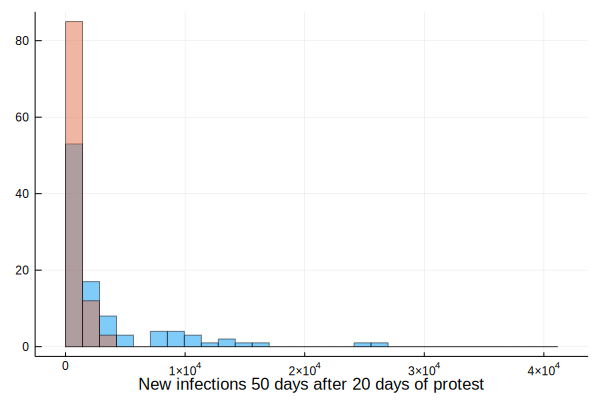

In [54]:
protestdays(dt, 20,50)

In [242]:
function protestheat(dt,nd=30,nb=30)
    maxprotest=42
    biggest=0
    smallest=Inf
    nb=nb+1
    for i in 1:maxprotest
        biggest=maximum([biggest,maximum(dt["fe"][i][nd,:]+dt["rm"][i][nd,:])])
        smallest=minimum([biggest,minimum(dt["fe"][i][nd,:]+dt["rm"][i][nd,:])])
    end
    println(smallest)
    hbins=range(log(smallest), stop=log(biggest), length=nb )
    hbins=exp.(hbins)
    htmp=Array{Int64,2}(undef, nb-1, maxprotest)
    for i in 1:maxprotest
        for j in 1:(nb-1)
            infect=dt["fe"][i][nd,:]+dt["rm"][i][nd,:]
            htmp[j,i]= sum(x -> (x>=hbins[j] && x<=hbins[j+1]), infect)
       end
    end
    return htmp, hbins, 1:maxprotest
end

protestheat (generic function with 3 methods)

In [296]:
ndays=20
htmp,htbins,htpro=protestheat(dt,ndays)

40


([5 4 … 6 6; 8 8 … 7 5; … ; 0 0 … 0 0; 0 0 … 0 0], [40.0, 46.55363557436037, 54.181024629758774, 63.058091891480814, 73.3895857482632, 85.4138007469479, 99.40807382486102, 115.69518104979237, 134.6507824075419, 156.71208635007994  …  967.8896091087785, 1126.4695034665042, 1311.0312687502587, 1525.8317977997708, 1775.8254365635407, 2066.7782554364635, 2405.4010429150344, 2799.504089051321, 3258.1773287656715, 3792.0000000000027], 1:42)

In [297]:
plot()
heatmap(htpro,htbins[1:end-1],htmp,yaxis=:log, c=cgrad([:white, :yellow, :red, :violet ]),xlabel="days of protest",ylabel="impact/infection")
ind=findmax(htmp,dims=1)
plot!(htbins[[i[1] for i in ind[2]]'],linewidth=2,linecolor=:red,legend=false) #mode
plot!((htbins[1:end-1]'*htmp)'/100,linewidth=3,linecolor=:black,legend=false) #median
plot!(title="Impact after $ndays days")

<!DOCTYPE html>
 
 
 Plots.jl

In [291]:
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/michael/.julia/packages/Plots/cc8wh/src/backends.jl:363


Plots.PlotlyBackend()